In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler


In [ ]:
train_labels =[]
train_samples =[]

2100 individuals in training set<br>
age < 65 --> 5% experienced side effects<br>
age >= 65 --> 95% experienced side effects<br>

In [ ]:
# 0 --> no side effect
# 1 --> for side effect
for i in range (50):
  # 5% of younger who experienced side effects
  random_younger = randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  #5% of older who did not experience side effects
  random_older = randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range (1000):
   #95% of younger who did not experience side effects
   random_younger = randint(13,64)
   train_samples.append(random_younger)
   train_labels.append(0)

   #95% of older who did experience side effects
   random_older = randint(65,100)
   train_samples.append(random_older)
   train_labels.append(1)

In [ ]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)
train_labels,train_samples = shuffle(train_labels,train_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

building the model


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy


In [ ]:
model = Sequential([
    Dense(units =16, input_shape =(1,), activation = 'relu'),
    Dense(units =32, activation = 'relu'),
    Dense(units =2, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642 (2.51 KB)
Trainable params: 642 (2.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy', metrics =['Accuracy'])


In [ ]:
model.fit(x=scaled_train_samples, y = train_labels,validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2 )

In [ ]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

PREDICT

In [ ]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)

In [ ]:
for i in predictions:
  print(i)

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred= rounded_predictions)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[200  10]
 [ 10 200]]


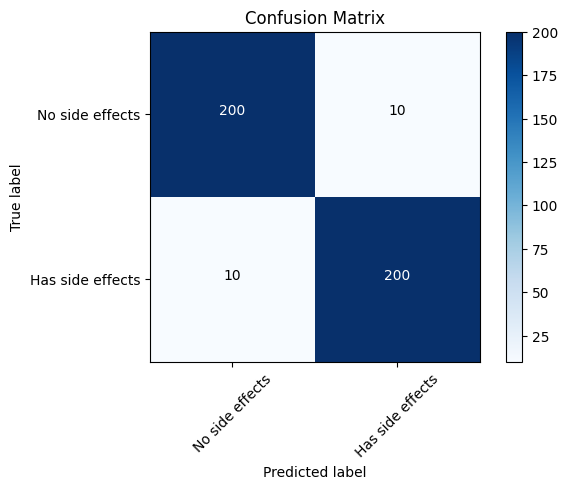

In [ ]:
cm_plot_labels = ['No side effects','Has side effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

**save the model**

In [ ]:
import os.path
if os.path.isfile('models/medical_trail_model.h5') is False:
  model.save('models/medical_trail_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
